In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == "g").astype(int)

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

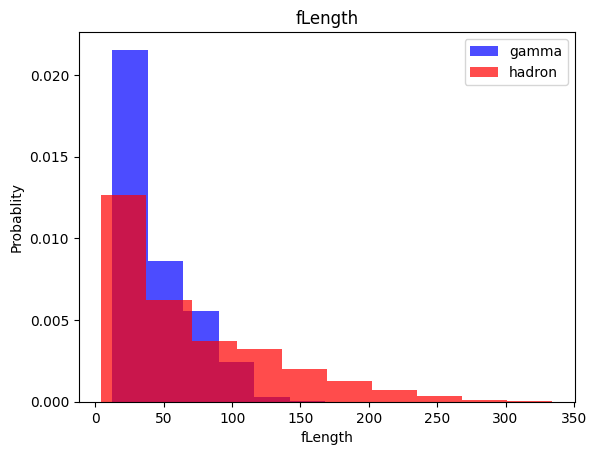

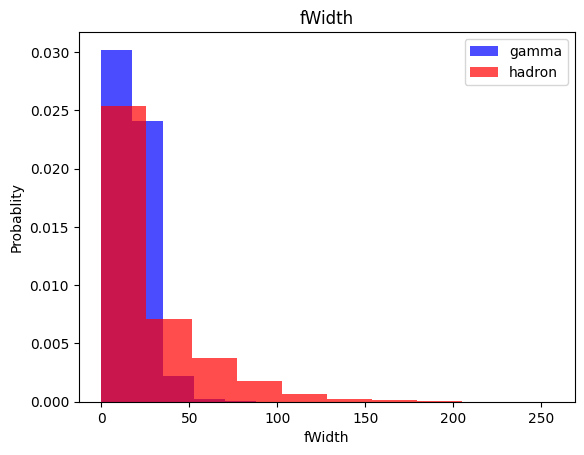

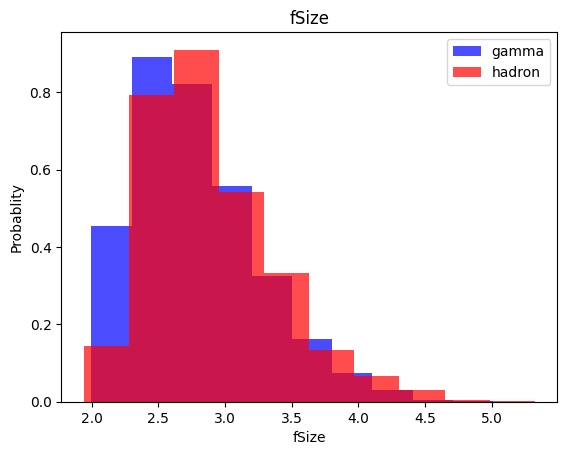

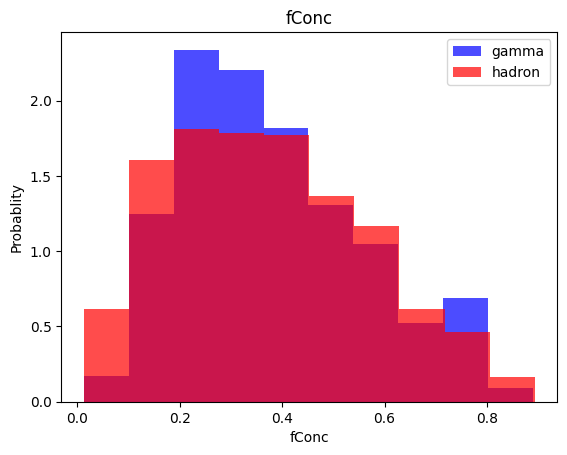

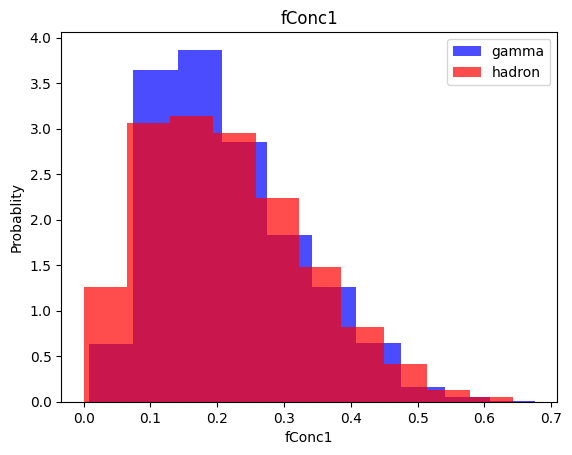

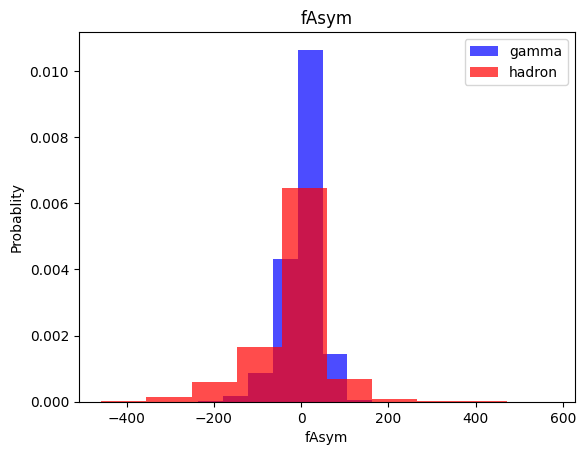

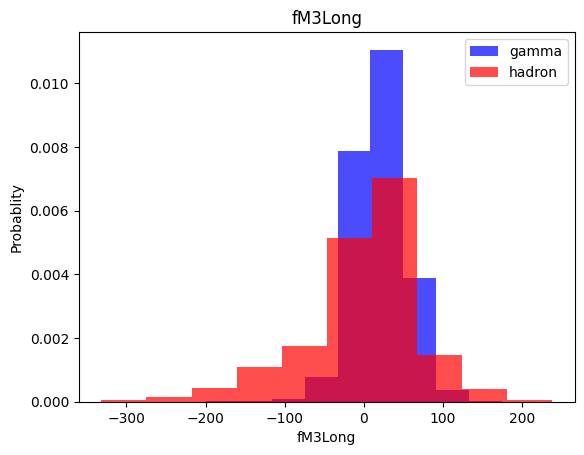

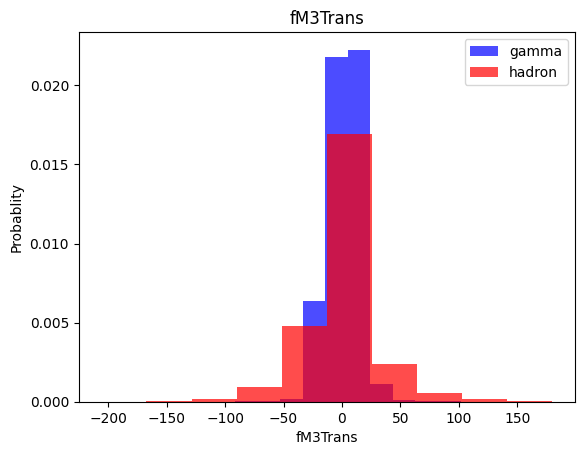

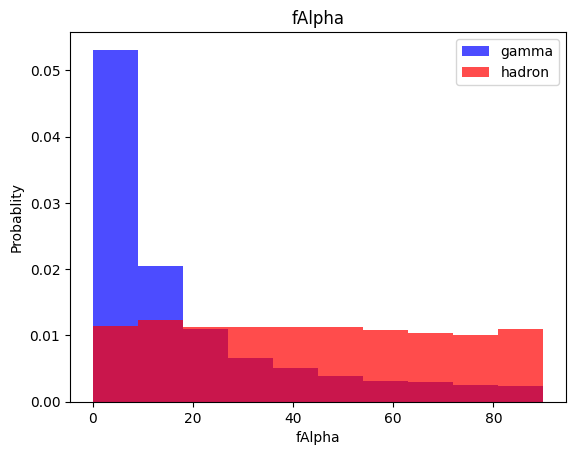

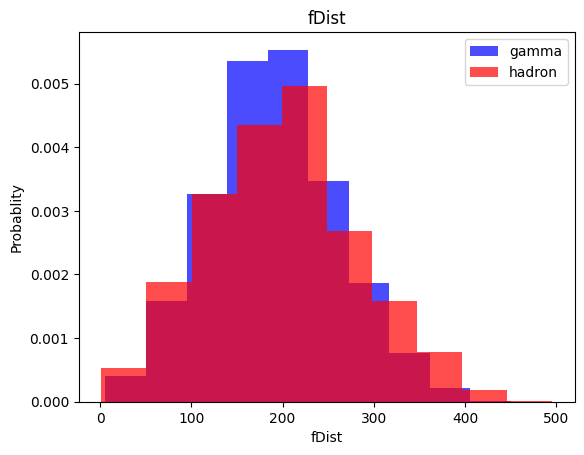

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probablity")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation, test datasets

In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [9]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=True)
test, X_test, Y_test = scale_dataset(test, oversample=True)


# k Nearest Neighbour

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      2489
           1       0.76      0.86      0.81      2489

    accuracy                           0.79      4978
   macro avg       0.80      0.79      0.79      4978
weighted avg       0.80      0.79      0.79      4978



# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [16]:
y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53      2489
           1       0.60      0.90      0.72      2489

    accuracy                           0.65      4978
   macro avg       0.70      0.65      0.63      4978
weighted avg       0.70      0.65      0.63      4978



# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [19]:
y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2489
           1       0.74      0.83      0.78      2489

    accuracy                           0.77      4978
   macro avg       0.77      0.77      0.77      4978
weighted avg       0.77      0.77      0.77      4978



# SVM

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [22]:
y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2489
           1       0.81      0.90      0.85      2489

    accuracy                           0.84      4978
   macro avg       0.85      0.84      0.84      4978
weighted avg       0.85      0.84      0.84      4978



# Neural Network

In [23]:
import tensorflow as tf

In [24]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.grid(True)

    ax2.plot(history.history["accuracy"], label="accuracy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)

    plt.show()

In [25]:
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy",
                    metrics=["accuracy"])
    
    history = nn_model.fit(
        X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


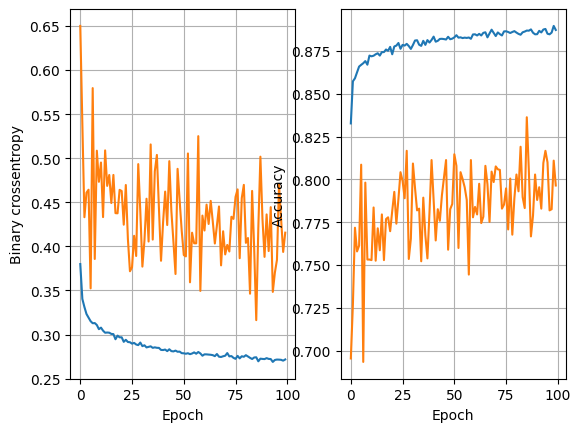

153/153 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 0.8311
16 nodes, dropout 0, lr 0.01, batch size 64


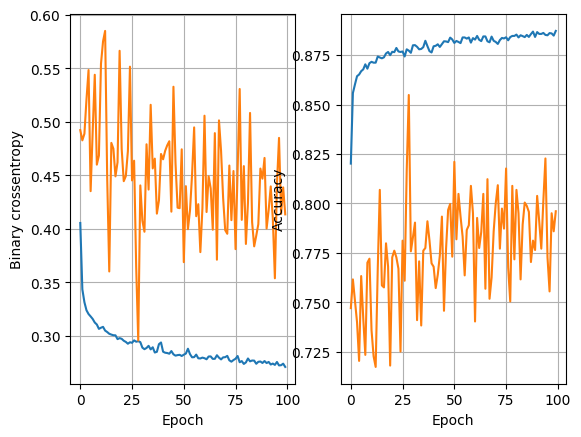

153/153 [==============================] - 0s 822us/step - loss: 0.3930 - accuracy: 0.8287
16 nodes, dropout 0, lr 0.01, batch size 128


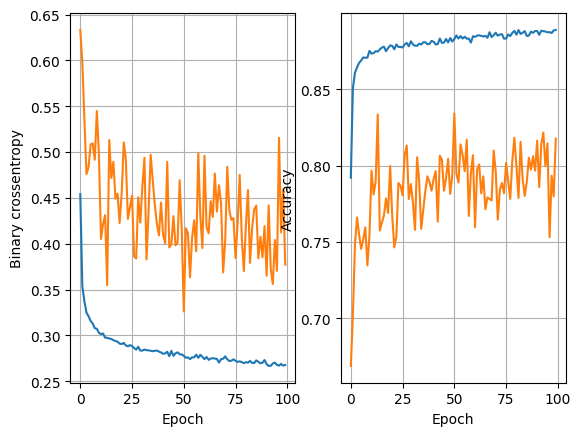

153/153 [==============================] - 0s 1ms/step - loss: 0.3808 - accuracy: 0.8361
16 nodes, dropout 0, lr 0.05, batch size 32


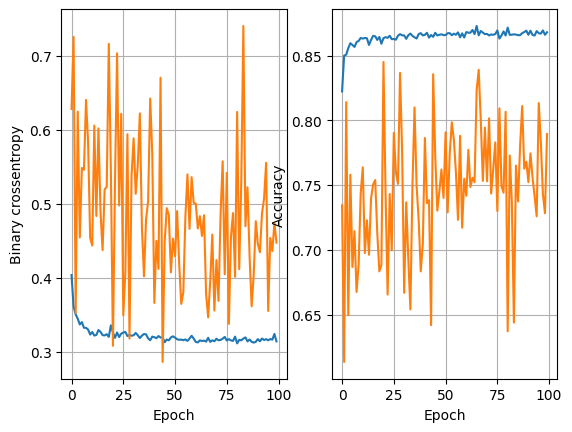

153/153 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.8322
16 nodes, dropout 0, lr 0.05, batch size 64


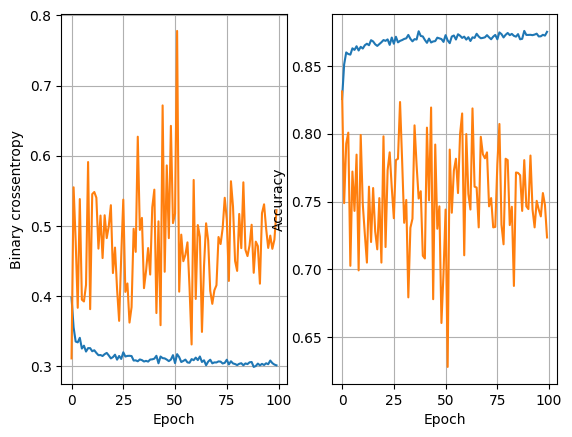

153/153 [==============================] - 0s 987us/step - loss: 0.4037 - accuracy: 0.8189
16 nodes, dropout 0, lr 0.05, batch size 128


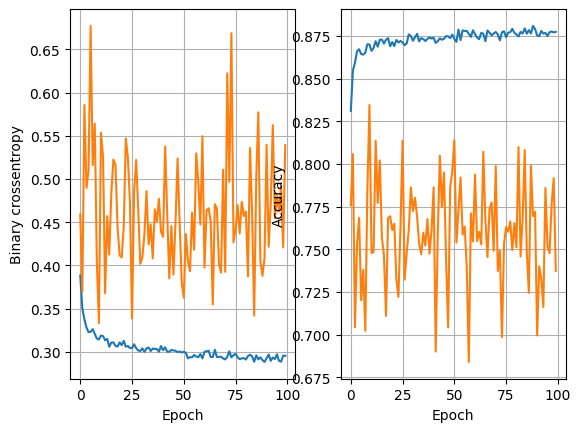

153/153 [==============================] - 0s 828us/step - loss: 0.4142 - accuracy: 0.8148
16 nodes, dropout 0, lr 0.001, batch size 32


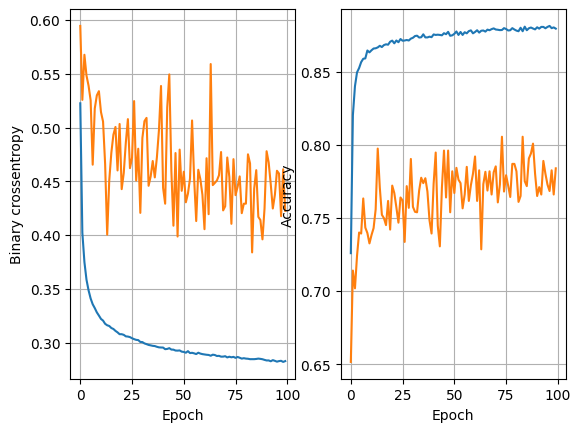

153/153 [==============================] - 0s 753us/step - loss: 0.3731 - accuracy: 0.8320
16 nodes, dropout 0, lr 0.001, batch size 64


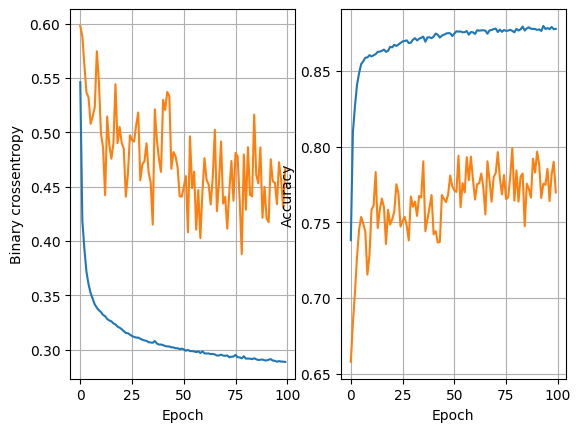

153/153 [==============================] - 0s 775us/step - loss: 0.3803 - accuracy: 0.8287
16 nodes, dropout 0, lr 0.001, batch size 128


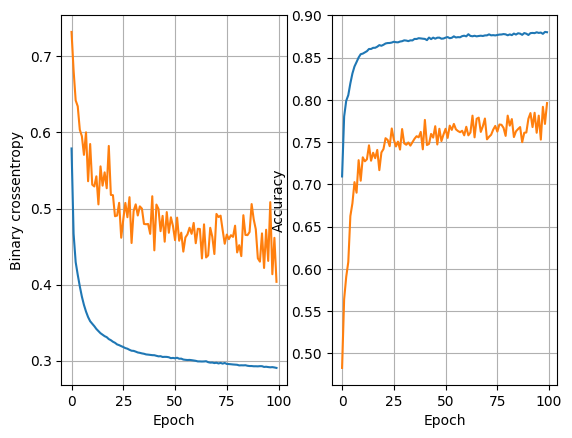

153/153 [==============================] - 0s 828us/step - loss: 0.3692 - accuracy: 0.8355
16 nodes, dropout 0.2, lr 0.01, batch size 32


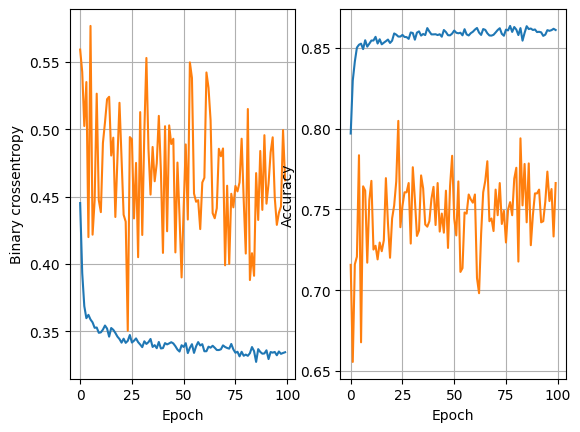

153/153 [==============================] - 0s 899us/step - loss: 0.3811 - accuracy: 0.8230
16 nodes, dropout 0.2, lr 0.01, batch size 64


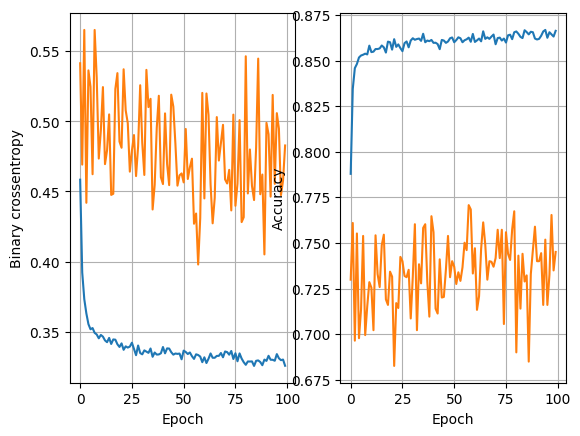

153/153 [==============================] - 0s 734us/step - loss: 0.3817 - accuracy: 0.8244
16 nodes, dropout 0.2, lr 0.01, batch size 128


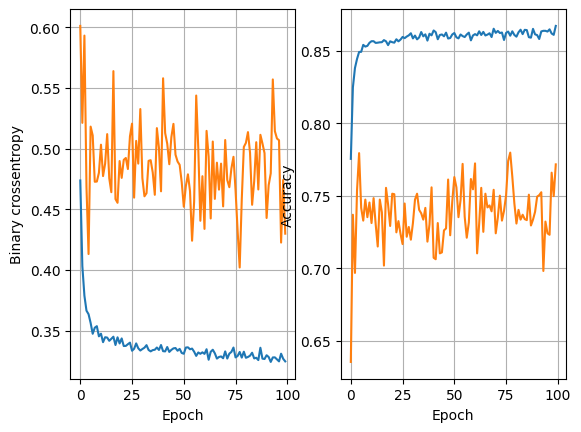

153/153 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8303
16 nodes, dropout 0.2, lr 0.05, batch size 32


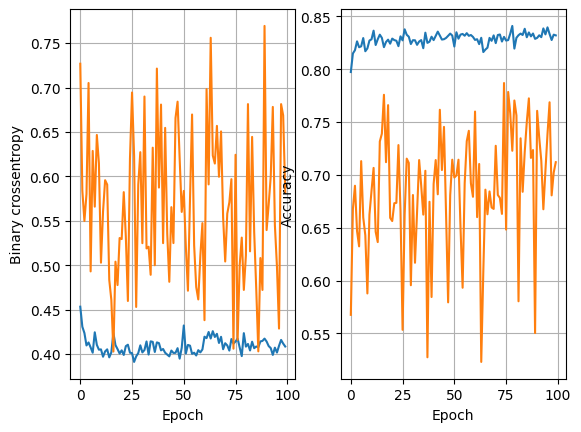

153/153 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.8109
16 nodes, dropout 0.2, lr 0.05, batch size 64


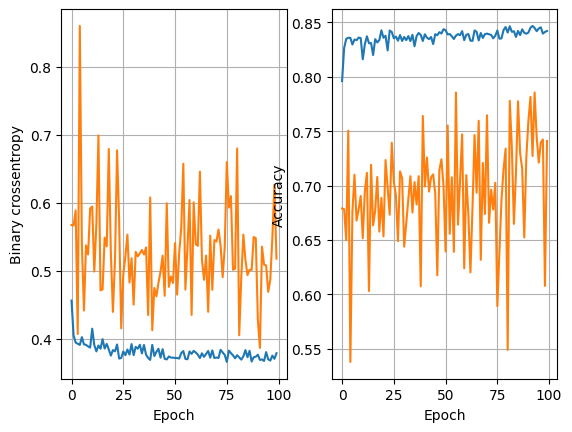

153/153 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8074
16 nodes, dropout 0.2, lr 0.05, batch size 128


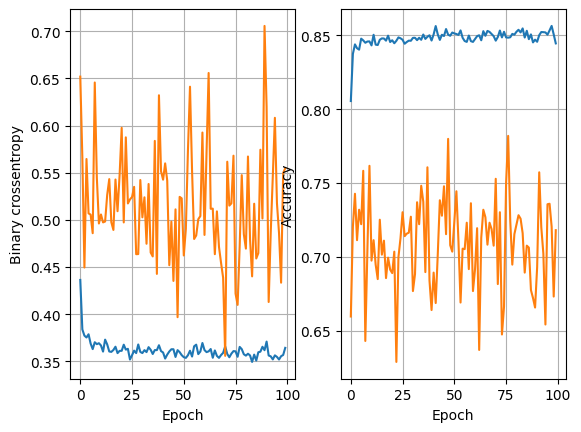

153/153 [==============================] - 0s 932us/step - loss: 0.4236 - accuracy: 0.8066
16 nodes, dropout 0.2, lr 0.001, batch size 32


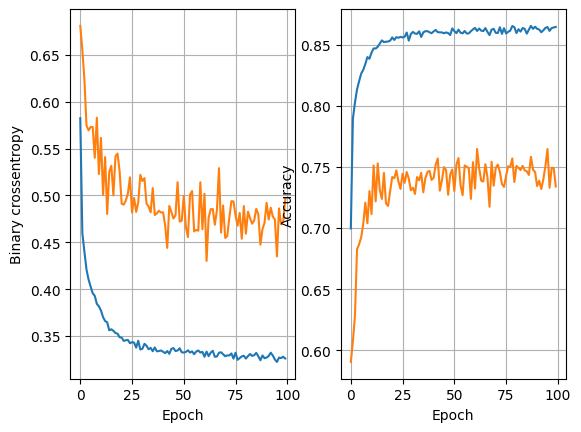

153/153 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8137
16 nodes, dropout 0.2, lr 0.001, batch size 64


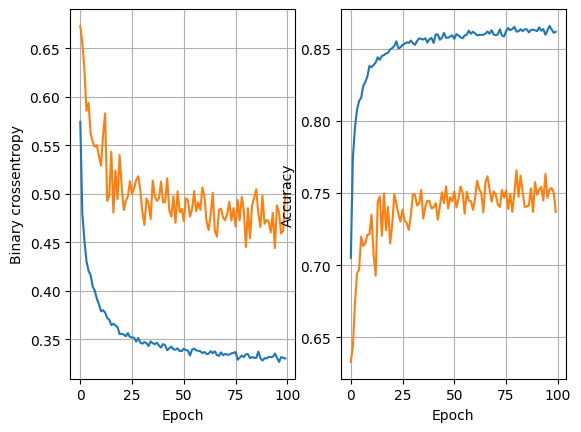

153/153 [==============================] - 0s 957us/step - loss: 0.3922 - accuracy: 0.8127
16 nodes, dropout 0.2, lr 0.001, batch size 128


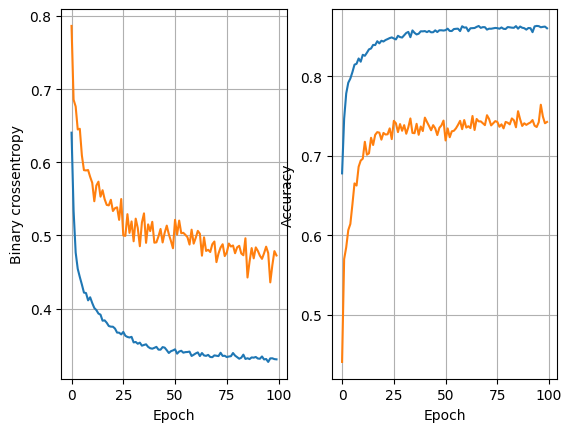

153/153 [==============================] - 0s 934us/step - loss: 0.3790 - accuracy: 0.8230
32 nodes, dropout 0, lr 0.01, batch size 32


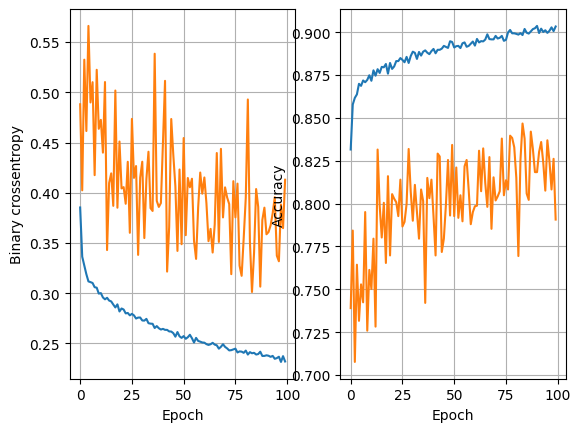

153/153 [==============================] - 0s 921us/step - loss: 0.4667 - accuracy: 0.8096
32 nodes, dropout 0, lr 0.01, batch size 64


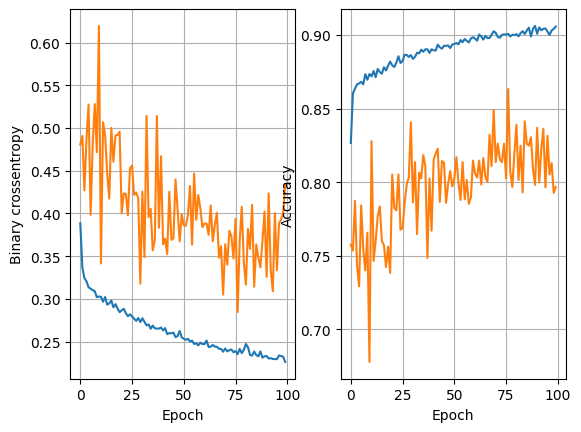

153/153 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.8266
32 nodes, dropout 0, lr 0.01, batch size 128


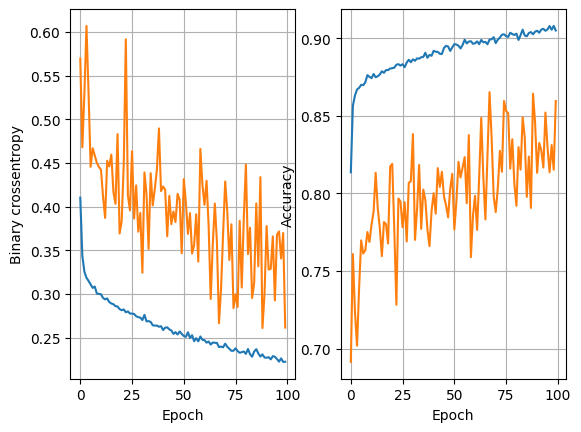

153/153 [==============================] - 0s 870us/step - loss: 0.4168 - accuracy: 0.8377
32 nodes, dropout 0, lr 0.05, batch size 32


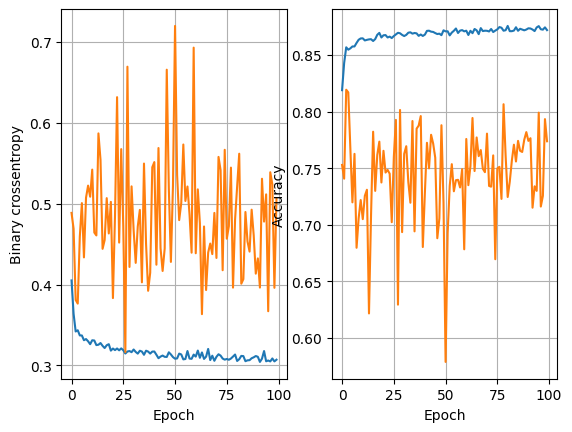

153/153 [==============================] - 0s 862us/step - loss: 0.4182 - accuracy: 0.8332
32 nodes, dropout 0, lr 0.05, batch size 64


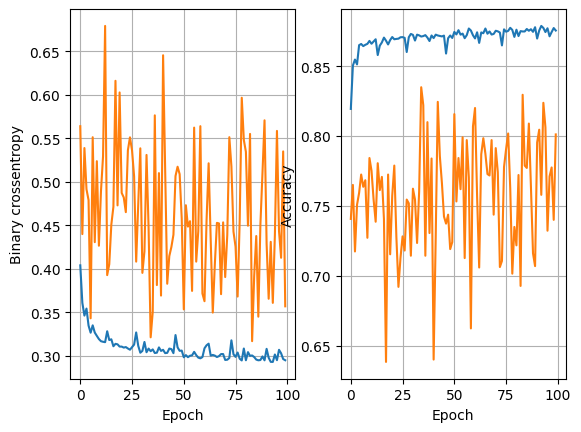

153/153 [==============================] - 0s 1ms/step - loss: 0.3657 - accuracy: 0.8340
32 nodes, dropout 0, lr 0.05, batch size 128


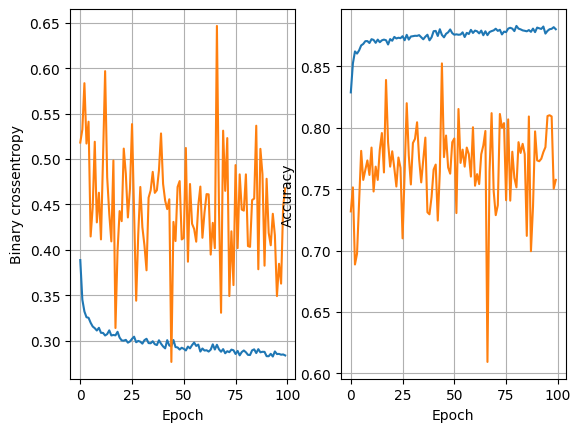

153/153 [==============================] - 0s 971us/step - loss: 0.4276 - accuracy: 0.8162
32 nodes, dropout 0, lr 0.001, batch size 32


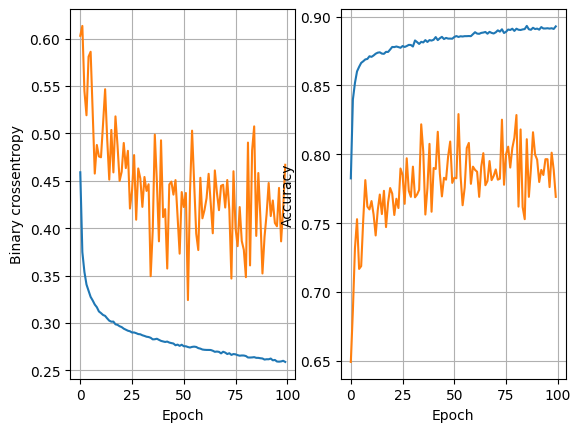

153/153 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8273
32 nodes, dropout 0, lr 0.001, batch size 64


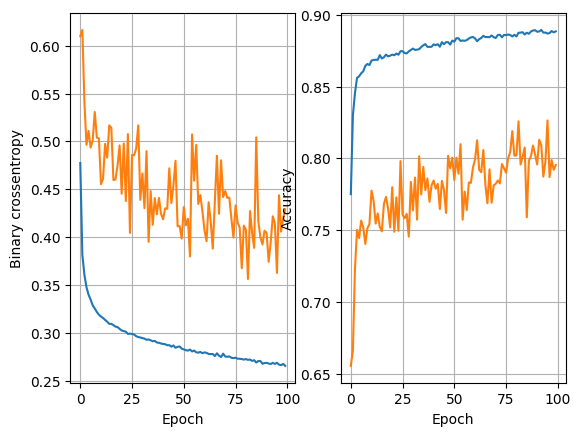

153/153 [==============================] - 0s 835us/step - loss: 0.3816 - accuracy: 0.8283
32 nodes, dropout 0, lr 0.001, batch size 128


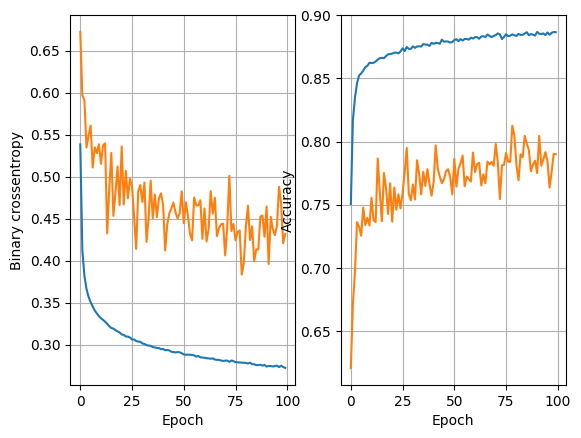

153/153 [==============================] - 0s 811us/step - loss: 0.3780 - accuracy: 0.8324
32 nodes, dropout 0.2, lr 0.01, batch size 32


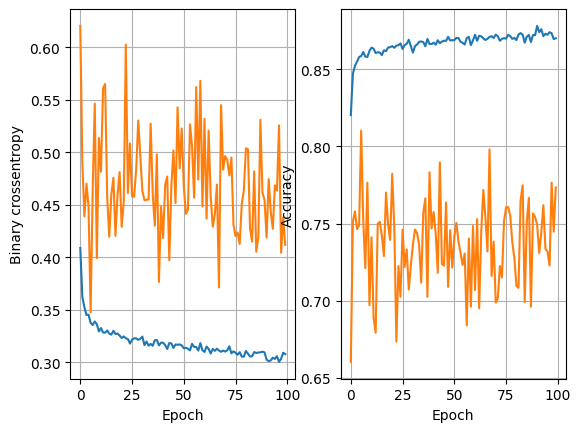

153/153 [==============================] - 0s 759us/step - loss: 0.3713 - accuracy: 0.8262
32 nodes, dropout 0.2, lr 0.01, batch size 64


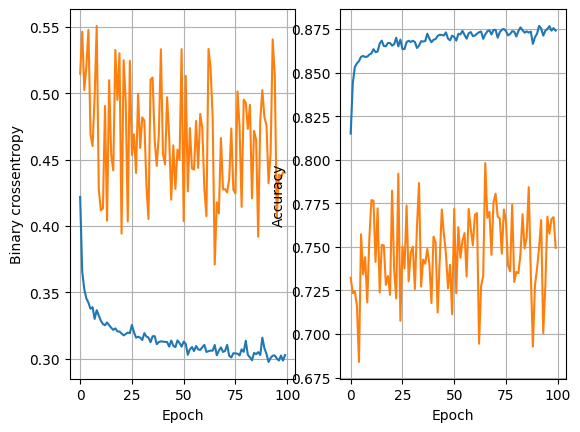

153/153 [==============================] - 0s 849us/step - loss: 0.3756 - accuracy: 0.8250
32 nodes, dropout 0.2, lr 0.01, batch size 128


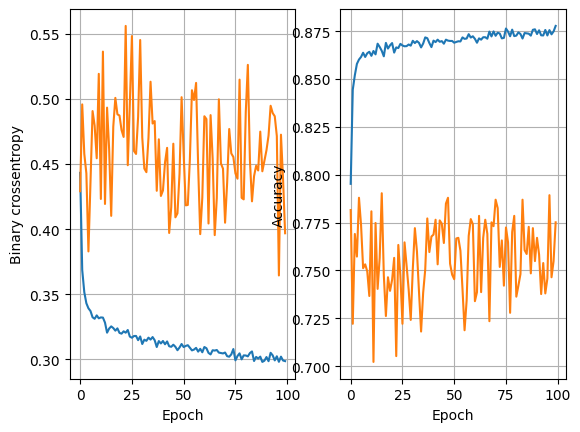

153/153 [==============================] - 0s 968us/step - loss: 0.3583 - accuracy: 0.8291
32 nodes, dropout 0.2, lr 0.05, batch size 32


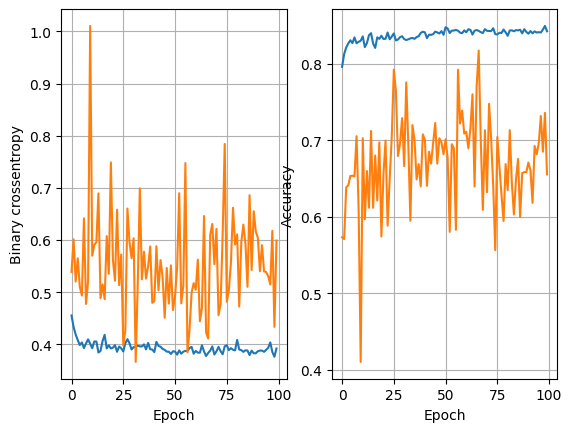

153/153 [==============================] - 0s 943us/step - loss: 0.4496 - accuracy: 0.7867
32 nodes, dropout 0.2, lr 0.05, batch size 64


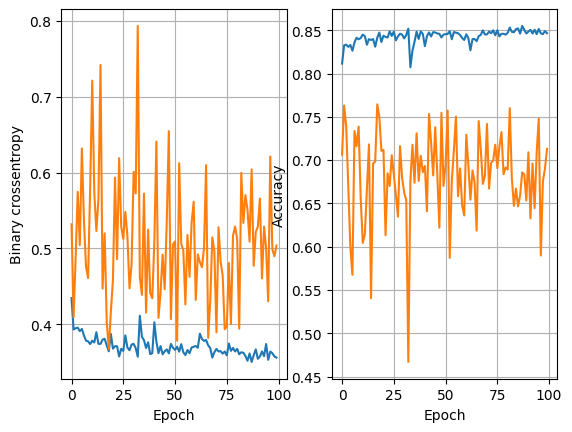

153/153 [==============================] - 0s 894us/step - loss: 0.4061 - accuracy: 0.8068
32 nodes, dropout 0.2, lr 0.05, batch size 128


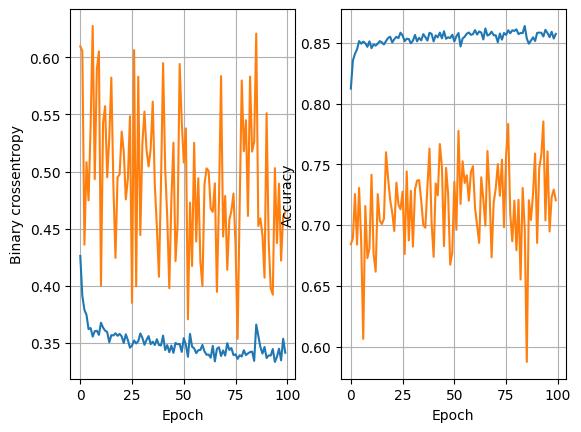

153/153 [==============================] - 0s 877us/step - loss: 0.3969 - accuracy: 0.8158
32 nodes, dropout 0.2, lr 0.001, batch size 32


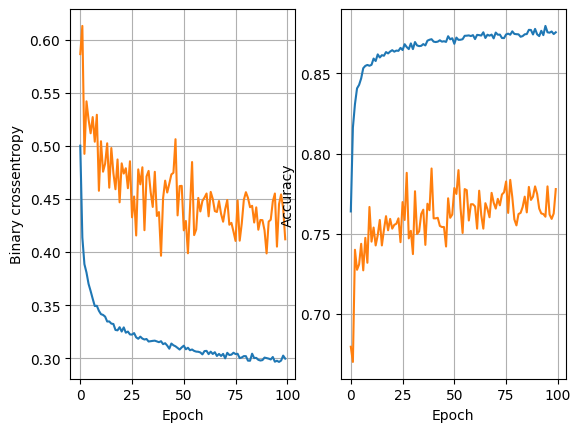

153/153 [==============================] - 0s 846us/step - loss: 0.3578 - accuracy: 0.8318
32 nodes, dropout 0.2, lr 0.001, batch size 64


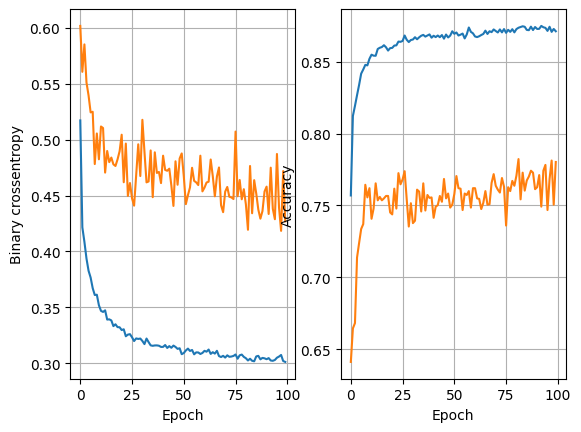

153/153 [==============================] - 0s 834us/step - loss: 0.3712 - accuracy: 0.8260
32 nodes, dropout 0.2, lr 0.001, batch size 128


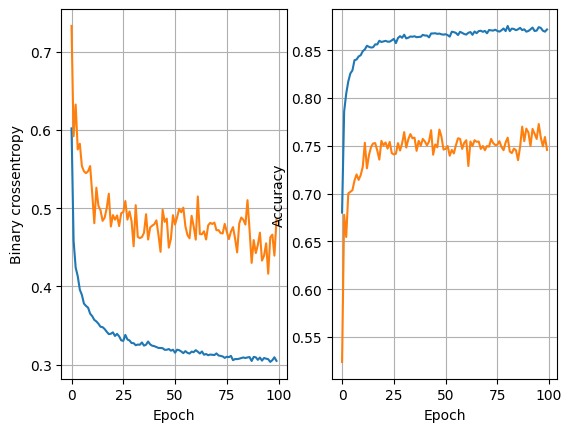

153/153 [==============================] - 0s 890us/step - loss: 0.3782 - accuracy: 0.8242
64 nodes, dropout 0, lr 0.01, batch size 32


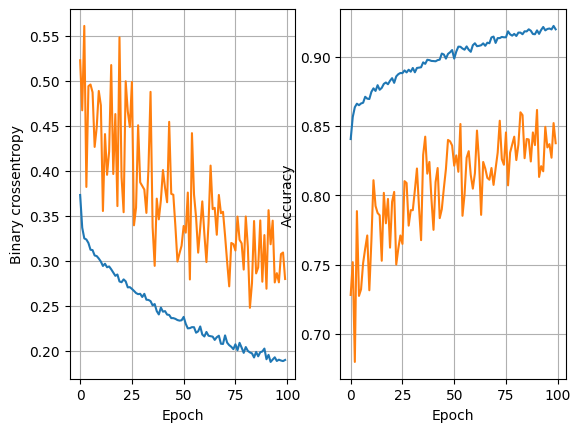

153/153 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.8285
64 nodes, dropout 0, lr 0.01, batch size 64


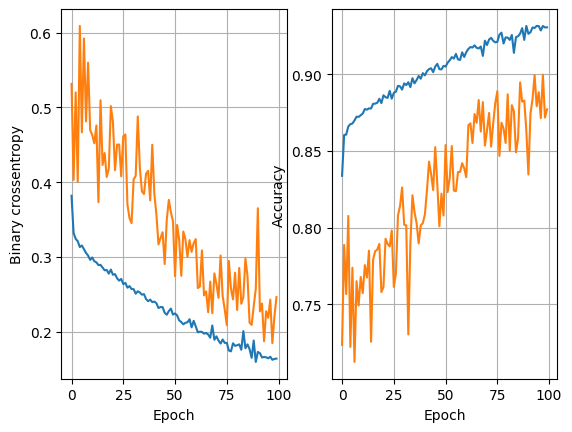

153/153 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.8246
64 nodes, dropout 0, lr 0.01, batch size 128


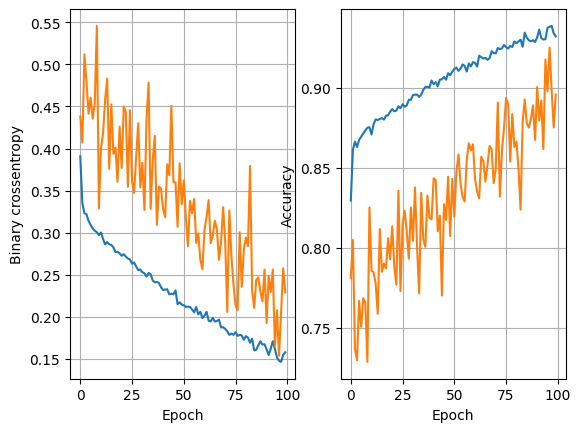

153/153 [==============================] - 0s 897us/step - loss: 0.6930 - accuracy: 0.8156
64 nodes, dropout 0, lr 0.05, batch size 32


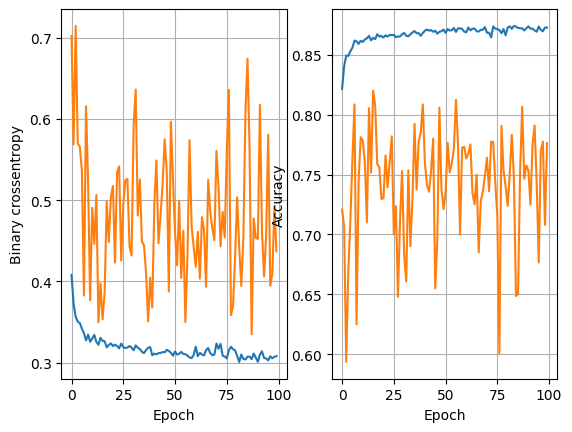

153/153 [==============================] - 0s 828us/step - loss: 0.3852 - accuracy: 0.8314
64 nodes, dropout 0, lr 0.05, batch size 64


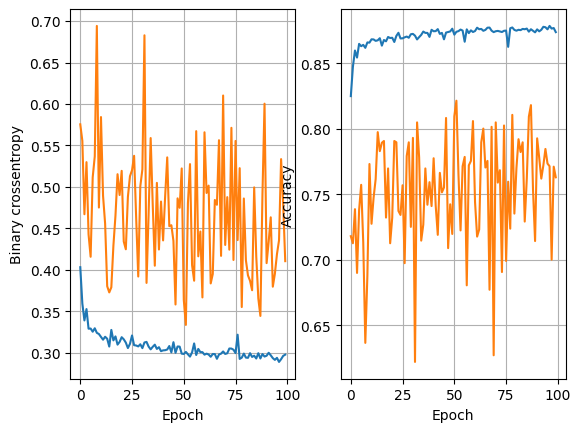

153/153 [==============================] - 0s 983us/step - loss: 0.3711 - accuracy: 0.8297
64 nodes, dropout 0, lr 0.05, batch size 128


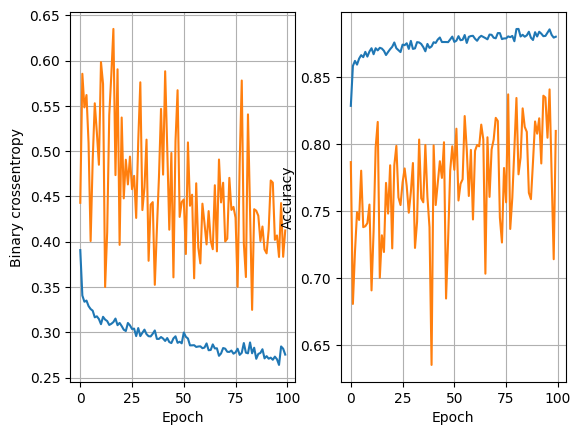

153/153 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8377
64 nodes, dropout 0, lr 0.001, batch size 32


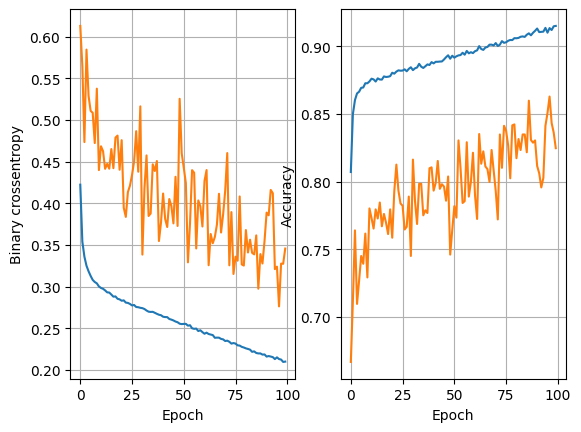

153/153 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8326
64 nodes, dropout 0, lr 0.001, batch size 64


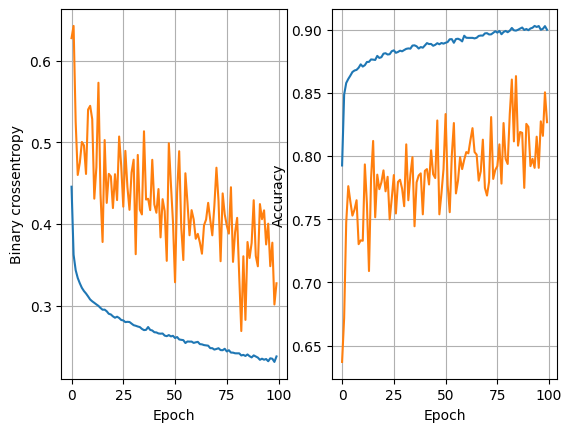

153/153 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8342
64 nodes, dropout 0, lr 0.001, batch size 128


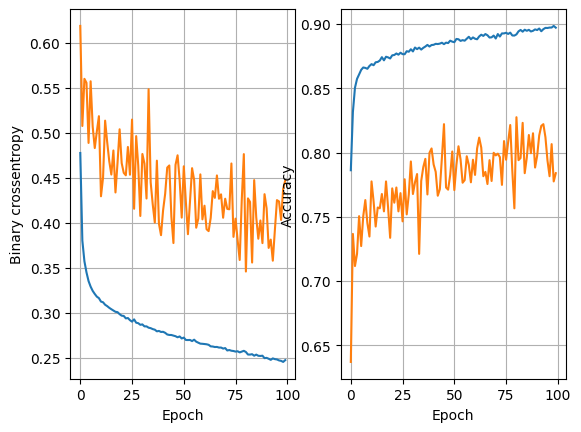

153/153 [==============================] - 0s 937us/step - loss: 0.4014 - accuracy: 0.8258
64 nodes, dropout 0.2, lr 0.01, batch size 32


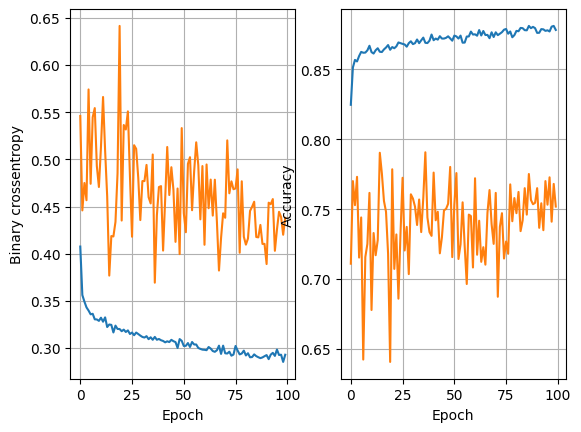

153/153 [==============================] - 0s 937us/step - loss: 0.3881 - accuracy: 0.8234
64 nodes, dropout 0.2, lr 0.01, batch size 64


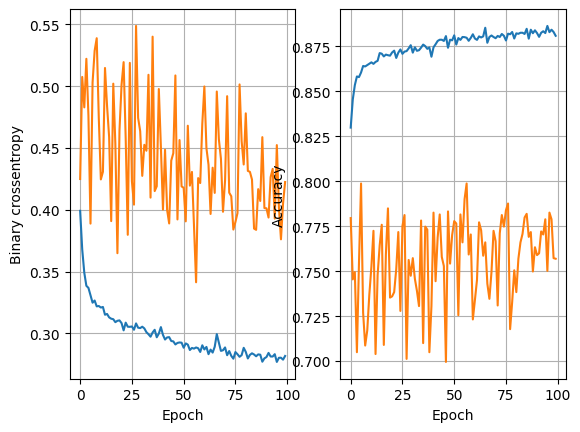

153/153 [==============================] - 0s 834us/step - loss: 0.3799 - accuracy: 0.8246
64 nodes, dropout 0.2, lr 0.01, batch size 128


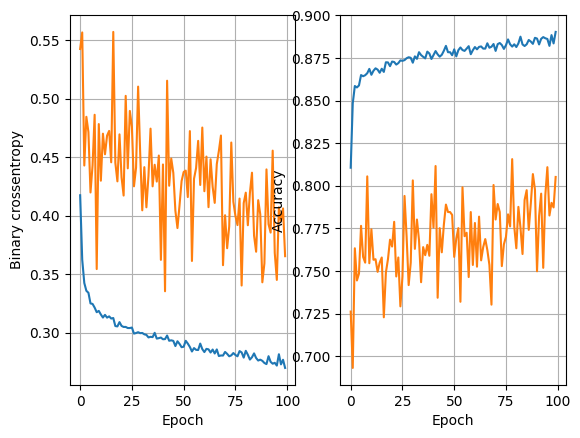

153/153 [==============================] - 0s 887us/step - loss: 0.3805 - accuracy: 0.8338
64 nodes, dropout 0.2, lr 0.05, batch size 32


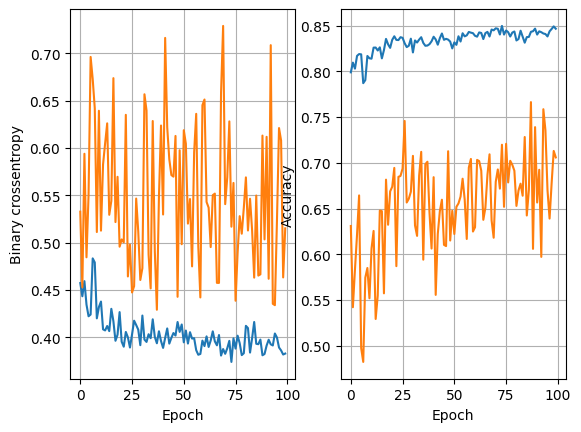

153/153 [==============================] - 0s 923us/step - loss: 0.4274 - accuracy: 0.8072
64 nodes, dropout 0.2, lr 0.05, batch size 64


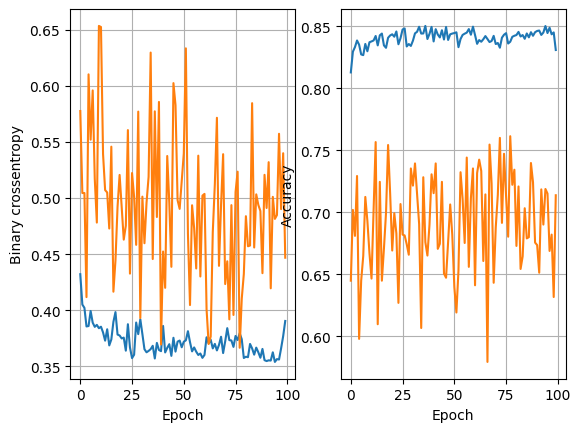

153/153 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8072
64 nodes, dropout 0.2, lr 0.05, batch size 128


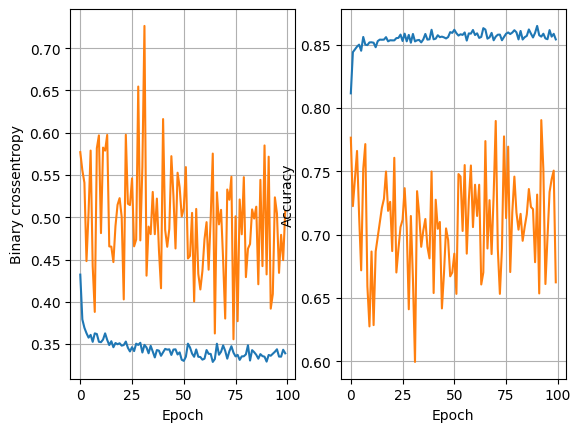

153/153 [==============================] - 0s 920us/step - loss: 0.3987 - accuracy: 0.7877
64 nodes, dropout 0.2, lr 0.001, batch size 32


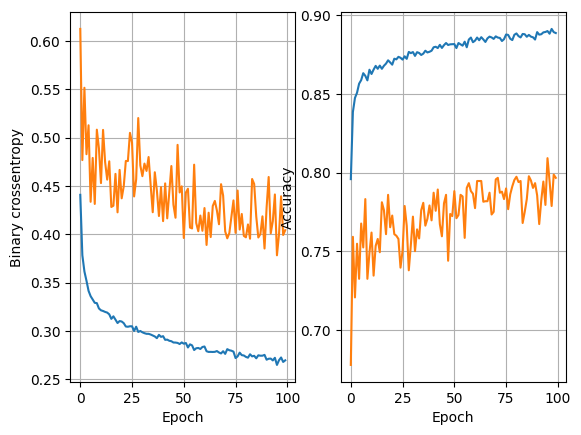

153/153 [==============================] - 0s 3ms/step - loss: 0.3617 - accuracy: 0.8367
64 nodes, dropout 0.2, lr 0.001, batch size 64


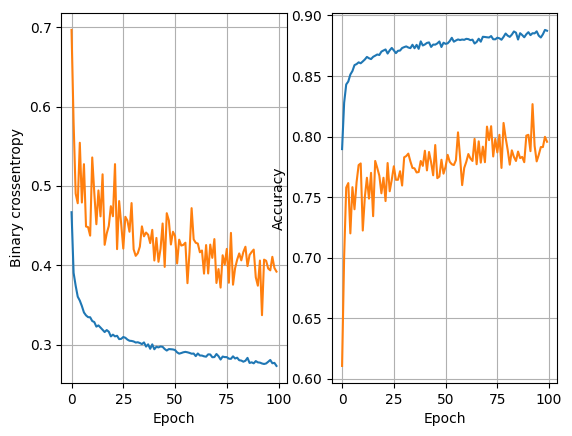

153/153 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8402
64 nodes, dropout 0.2, lr 0.001, batch size 128


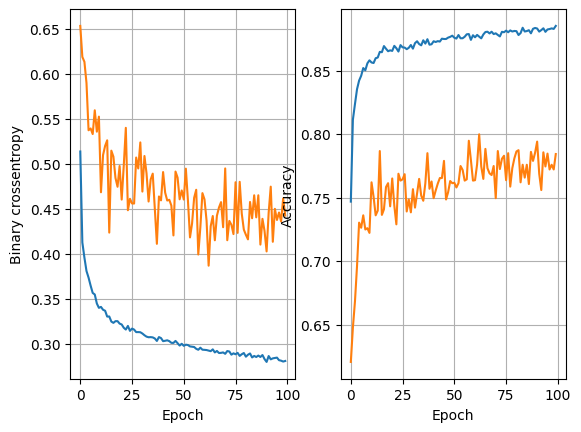

153/153 [==============================] - 0s 981us/step - loss: 0.3697 - accuracy: 0.8326


In [26]:
least_val_loss = float("inf")
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.05, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train,Y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, Y_valid)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model

In [27]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

156/156 [==============================] - 0s 733us/step


array([1, 1, 0, ..., 0, 0, 1])

In [28]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      2489
           1       0.80      0.94      0.86      2489

    accuracy                           0.85      4978
   macro avg       0.86      0.85      0.85      4978
weighted avg       0.86      0.85      0.85      4978

